# Exploration and Analysis

We now have created three CSV files, in which our data are split. Because we are missing a larger portion of data from before 1987 and after 2024, we have split our data in three files:
1. Containing data from before 1987
2. Containing data from 1987 to 2017
3. Containing data from 1987 to 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Load new combined CSV's with data

df_before_1987 = pd.read_csv('../notebooks/data between 1952 and 2024.csv') #insert
df_1987_2017 = pd.read_csv('../notebooks/data between 1987 and 2017.csv') #insert PRIMARY
df_1987_2024 = pd.read_csv('../notebooks/data after 1987.csv') #insert

In [13]:
df_before_1987.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16134 entries, 0 to 16133
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close SP500         16134 non-null  float64
 1   Open SP500          16134 non-null  float64
 2   High SP500          16134 non-null  float64
 3   Low SP500           16134 non-null  float64
 4   Volume SP500        16134 non-null  float64
 5   Interest Rate       16134 non-null  float64
 6   Unemployment Rate   16134 non-null  float64
 7   Inflation Rate      16134 non-null  float64
 8   CPIAUCSL            16134 non-null  float64
 9   Open RUSSELL2000    16134 non-null  float64
 10  High RUSSELL2000    16134 non-null  float64
 11  Low RUSSELL2000     16134 non-null  float64
 12  Close RUSSELL2000   16134 non-null  float64
 13  Volume RUSSELL2000  16134 non-null  float64
 14  Close Oil           16134 non-null  float64
 15  Close Gold          16134 non-null  float64
 16  Open

## Data overview
Let's see how the data looks in a line plot for the data frame df_1987_2017.

In [ ]:
df_1987_2017.plot.line(y=['Interest Rate', 'Inflation Rate', 'Unemployment Rate', 'Volume SP500', 'Close SP500', 'Close Gold', 'Volume RUSSELL2000', 'Close RUSSELL2000', 'Close Oil', 'CPIAUCSL'] , x='Date')

We have big diffences in the our graphs, and high numbers for some data makes other data unreadable in this plot. That suggest we might have to normalize our data at some point to make et more comparable.

## Normalization
We want to normalize our data to be able to better compare it, and then see in a line plot again.

In [15]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Extract 'Date' column and keep it separate
date_column = df_1987_2017['Date']

# Scale the rest of the columns except 'Date'
df_1987_2017_scaled = scaler.fit_transform(df_1987_2017.drop(columns=['Date']))

# Convert the scaled data back into a DataFrame
# Use the original column names except for 'Date'
df_1987_2017_scaled = pd.DataFrame(df_1987_2017_scaled, columns=df_1987_2017.columns.drop('Date'))

# Concatenate the 'Date' column back to the scaled DataFrame
df_1987_2017_scaled = pd.concat([date_column, df_1987_2017_scaled], axis=1)

# Display the first few rows of the scaled DataFrame
df_1987_2017_scaled.head()

,Date,Close SP500,Open SP500,High SP500,Low SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,...,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,Open Gold,High Gold,Low Gold,Change % Gold
0,1987-10-01,0.035319,0.029408,0.034437,0.036013,0.101192,0.738241,0.354839,0.74,0.0,...,0.050444,0.050705,0.050952,0.011931,0.069707,0.122093,0.123146,0.120409,0.124916,0.374038
1,1987-10-02,0.035829,0.030793,0.035367,0.037452,0.107882,0.738241,0.354839,0.74,0.0,...,0.050980,0.051605,0.051482,0.011571,0.070819,0.122950,0.122994,0.121254,0.125793,0.451514
2,1987-10-05,0.035833,0.031152,0.035348,0.037453,0.106223,0.738241,0.354839,0.74,0.0,...,0.051338,0.052145,0.051841,0.008992,0.071783,0.124141,0.123964,0.122429,0.127011,0.457671
3,1987-10-06,0.033505,0.030882,0.034678,0.035866,0.122658,0.738241,0.354839,0.74,0.0,...,0.051392,0.050611,0.050024,0.010387,0.070449,0.124256,0.124890,0.122543,0.127129,0.437660
4,1987-10-07,0.033217,0.028907,0.032887,0.034703,0.119889,0.738241,0.354839,0.74,0.0,...,0.049518,0.049320,0.048979,0.011326,0.070300,0.124627,0.125411,0.122908,0.127509,0.442278


<Axes: xlabel='Date'>

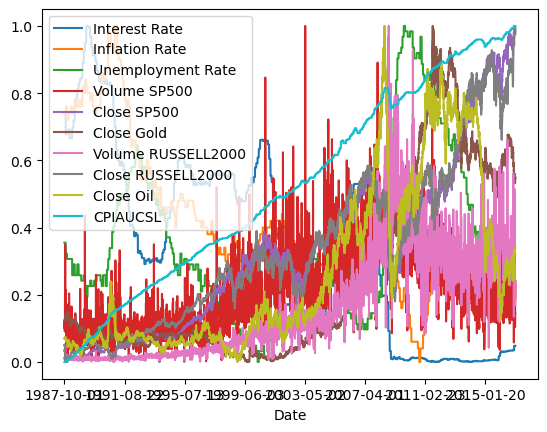

In [17]:
# Line plot of the scaled data set
df_1987_2017_scaled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Unemployment Rate', 'Volume SP500', 'Close SP500', 'Close Gold', 'Volume RUSSELL2000', 'Close RUSSELL2000', 'Close Oil', 'CPIAUCSL'] , x='Date')

## Data distribution
Now let's have a look at histograms for our data.

In [28]:
df_1987_2017.describe()

,Close SP500,Open SP500,High SP500,Low SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,...,OPEN_CLOSE_CHANGE_%_Gold,LOW_HIGH_CHANGE_%_SP500,LOW_HIGH_CHANGE_%_RUSSELL2000,LOW_HIGH_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,VOLUME_CHANGE_%_RUSSELL2000,VOLUME_CHANGE_%_SP500
count,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,31.972880,31.916387,32.344746,31.576726,6.911791e+06,3.444709,6.000160,2.601600,182.016731,540.082252,...,-0.000787,0.024936,0.013191,0.006673,-0.000900,-0.000280,-0.000173,0.017021,0.024925,0.030897
std,19.676993,19.733510,19.855109,19.487679,3.655362e+06,2.743893,1.493237,1.040665,37.525202,313.312671,...,0.009992,0.011835,0.010925,0.010899,0.039933,0.028216,0.033570,0.134296,0.292260,0.277575
min,6.374125,5.738150,6.469042,6.158590,8.535742e+05,0.070000,3.800000,0.600000,115.000000,105.459999,...,-0.084590,0.009858,0.001216,0.000000,-0.960000,-0.500000,-0.500000,-3.842000,-0.875276,-0.781967
25%,12.783908,12.780337,12.895425,12.660323,3.847917e+06,0.370000,5.000000,1.900000,150.500000,260.259995,...,-0.005355,0.018202,0.006207,0.000000,0.000000,0.000000,0.000000,0.000000,-0.086753,-0.122455
50%,30.586941,30.595221,31.068908,30.093133,6.284100e+06,3.500000,5.600000,2.300000,179.500000,479.365005,...,-0.001117,0.021298,0.010436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001483
75%,42.608881,42.608903,43.056460,42.161558,9.121011e+06,5.490000,6.800000,2.900000,217.281000,736.505005,...,0.003852,0.027524,0.016859,0.012285,0.000000,0.000000,0.000000,0.000000,0.099349,0.137096
max,84.556720,84.502996,85.317837,83.783470,2.984366e+07,9.850000,10.000000,5.600000,242.637000,1387.780029,...,0.112227,0.208090,0.143263,0.129909,0.530000,0.500000,0.500000,2.700000,6.748189,4.000360


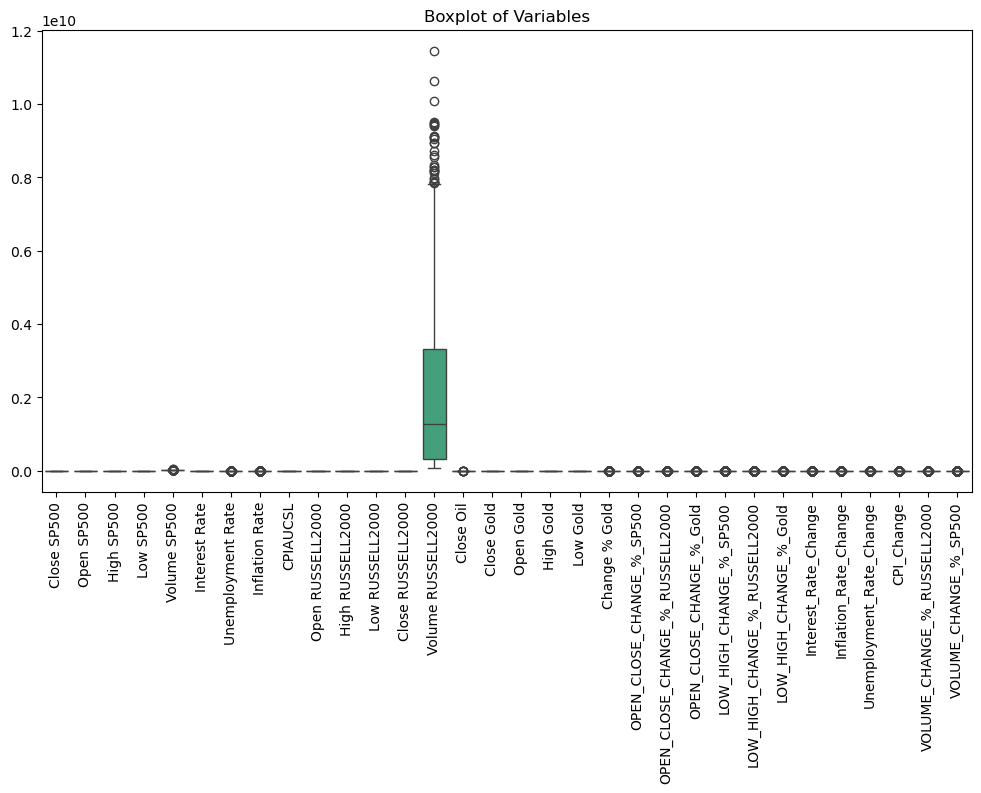

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1987_2017.drop(columns=['Date']))
plt.title('Boxplot of Variables')
plt.xticks(rotation=90)
plt.show()

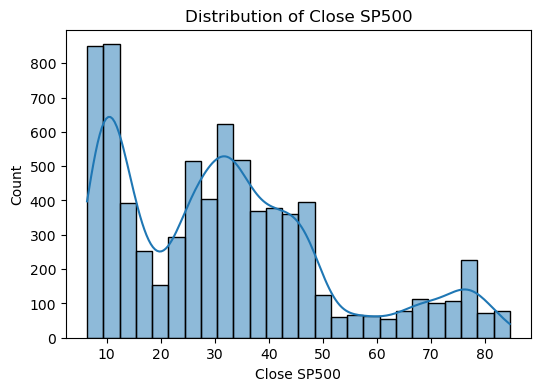

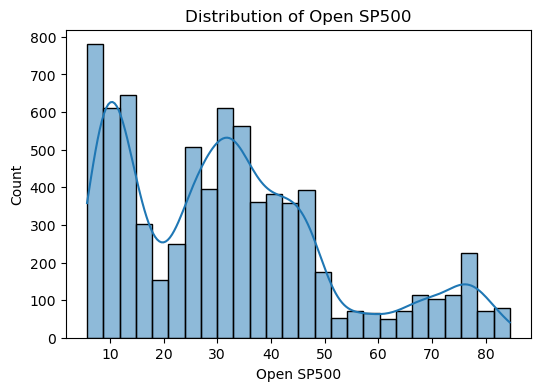

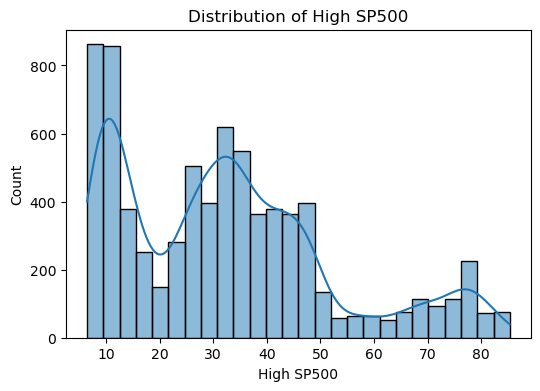

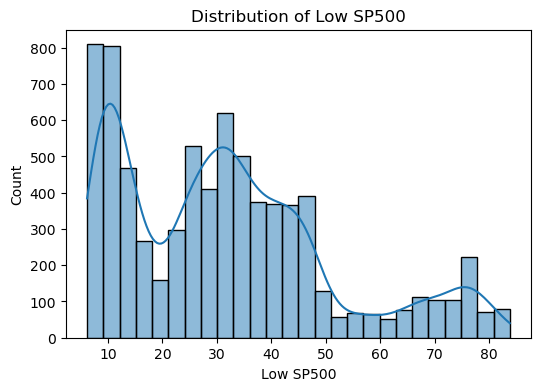

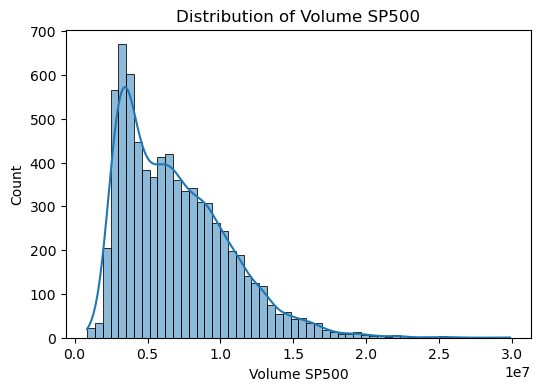

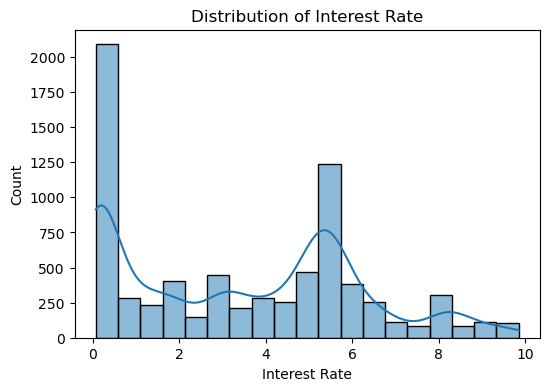

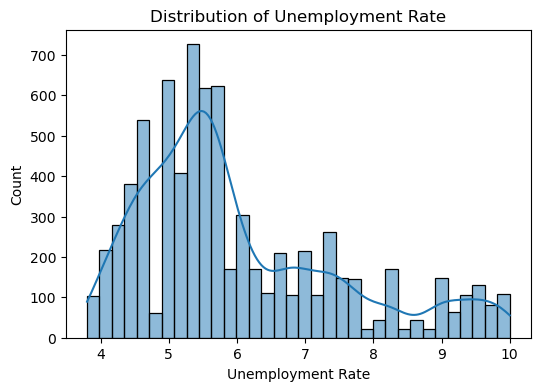

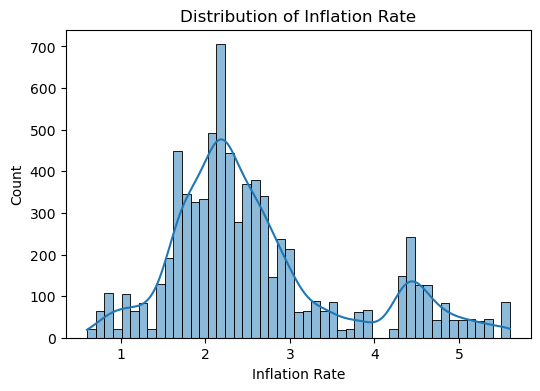

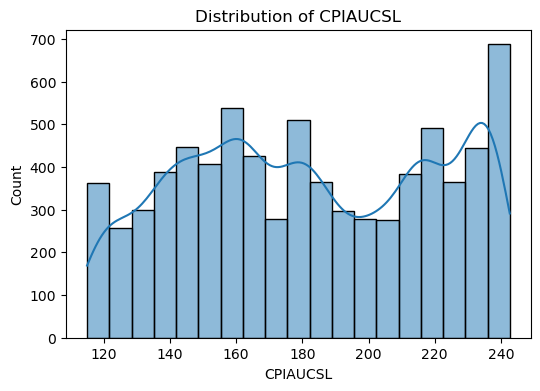

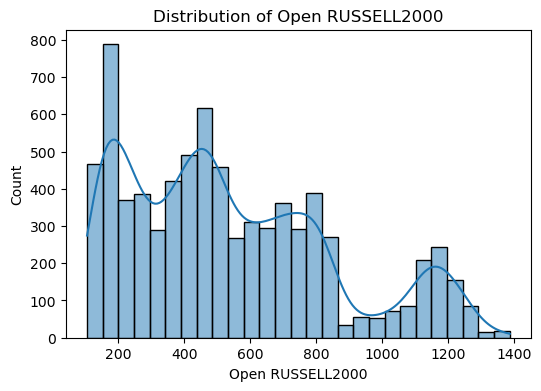

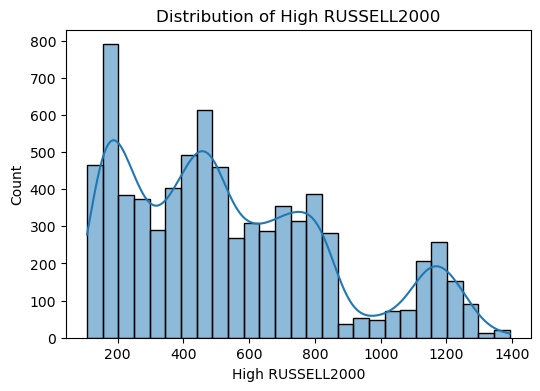

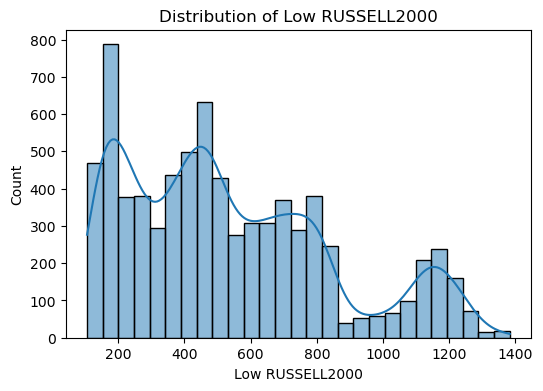

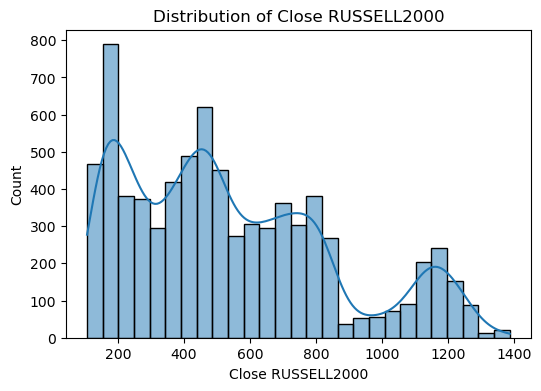

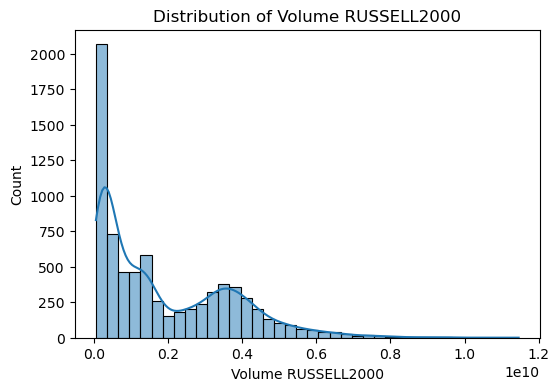

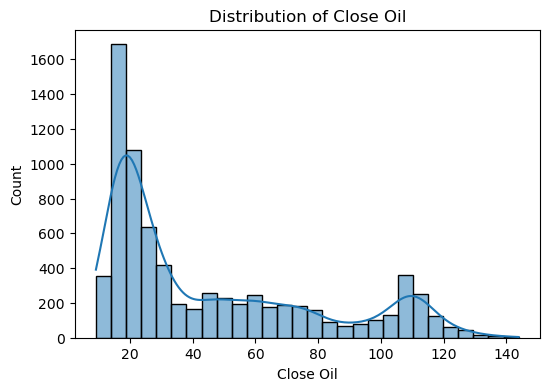

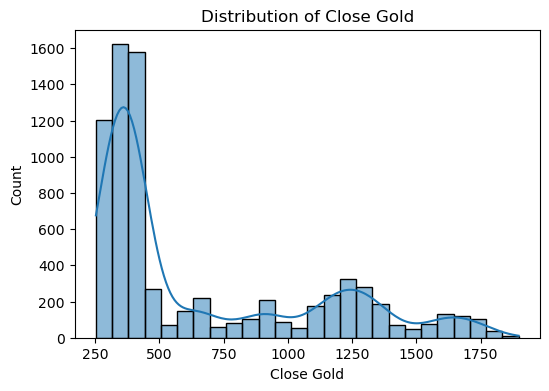

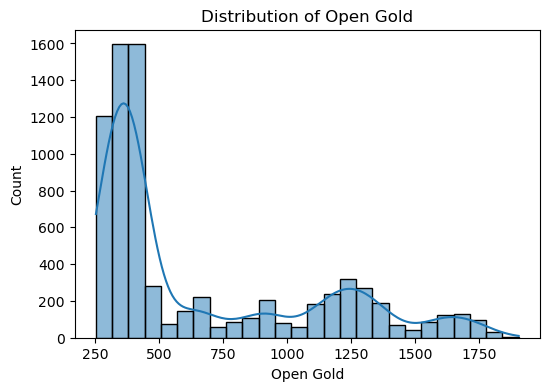

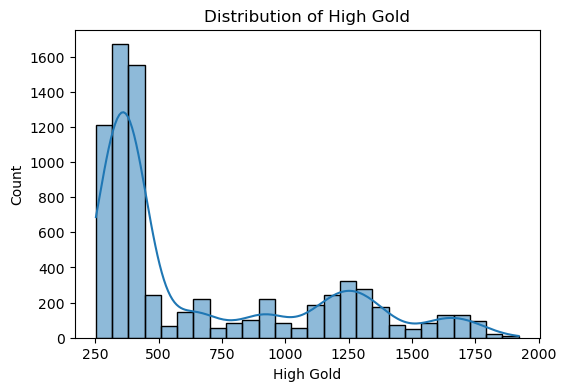

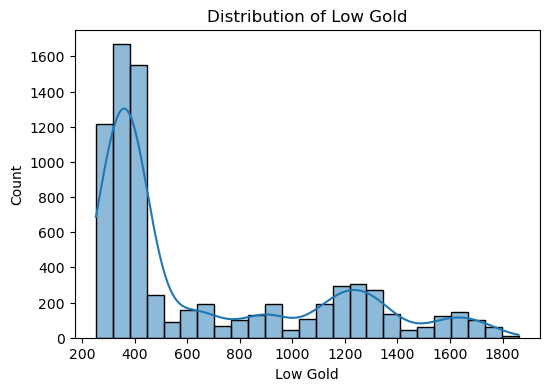

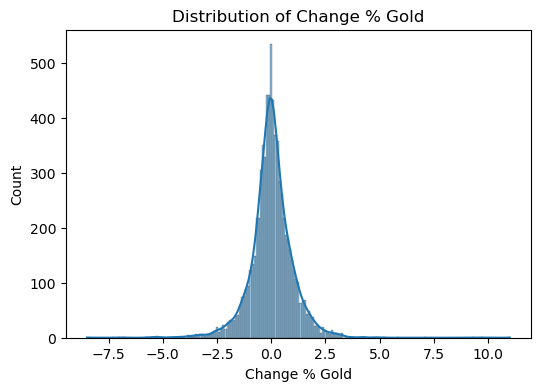

In [18]:
# Columns to check
columns_to_check = df_1987_2017.drop(columns=['Date'])

# Plot histogrammer for hver kolonne
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_1987_2017[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Comment something about the histograms

### Outliers
Now let's have a look at outliers in our data.

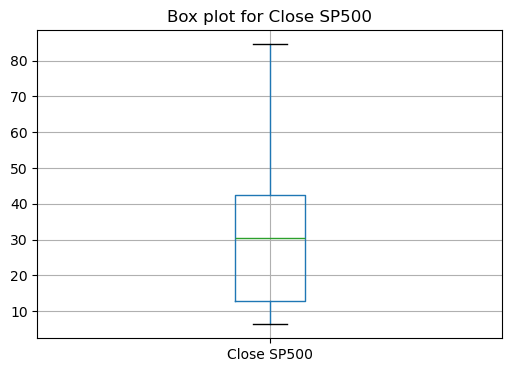

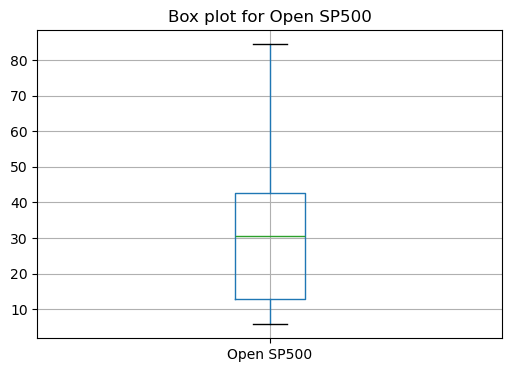

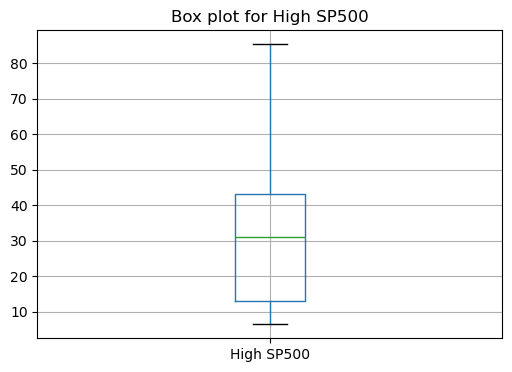

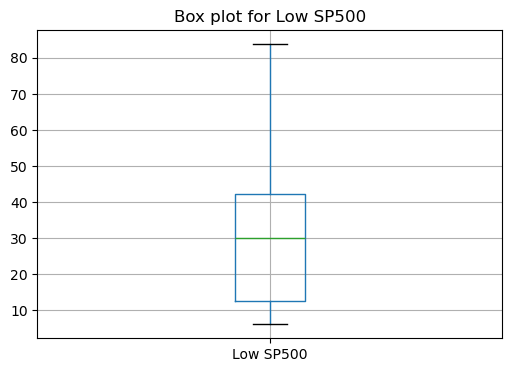

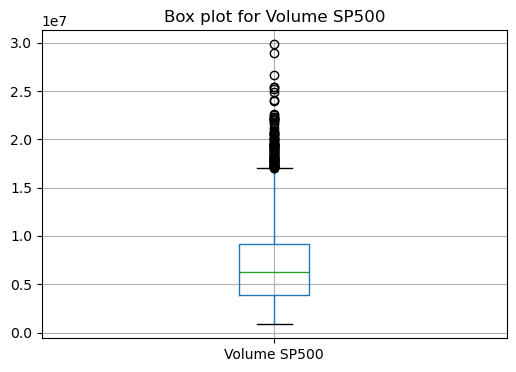

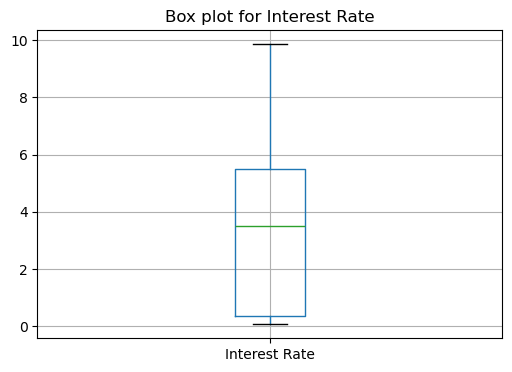

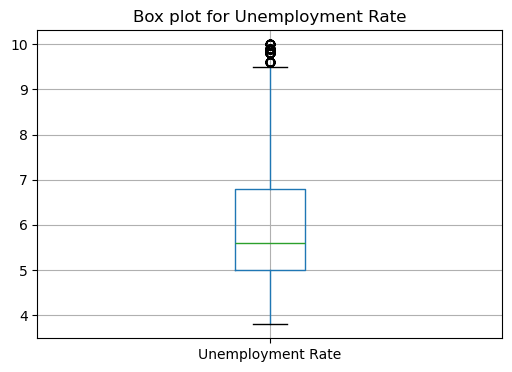

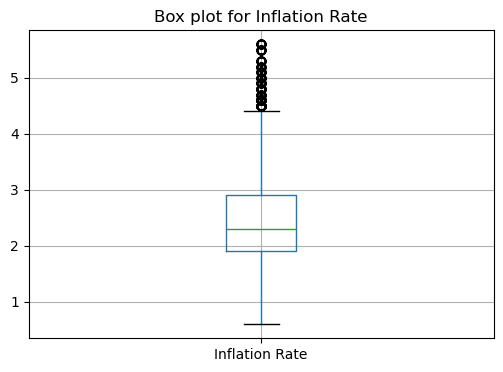

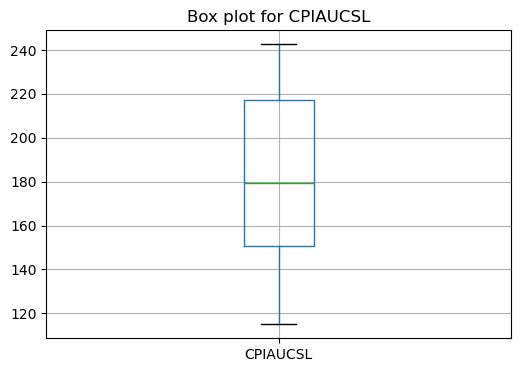

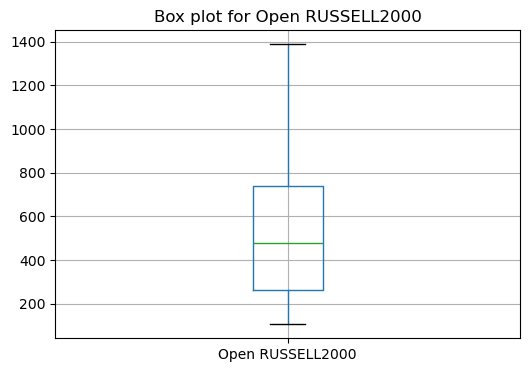

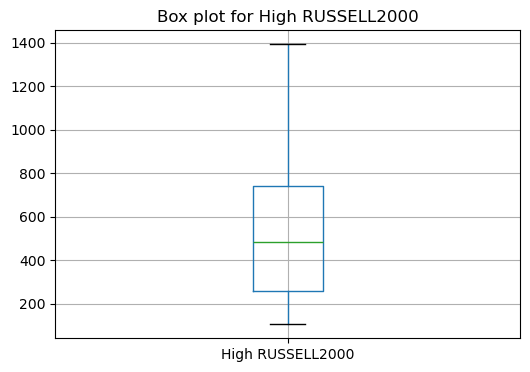

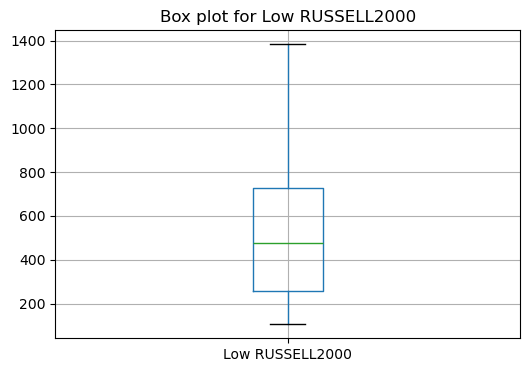

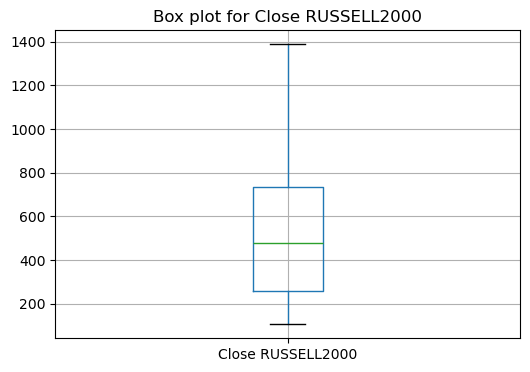

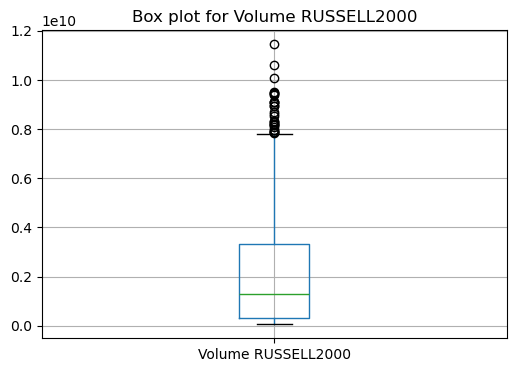

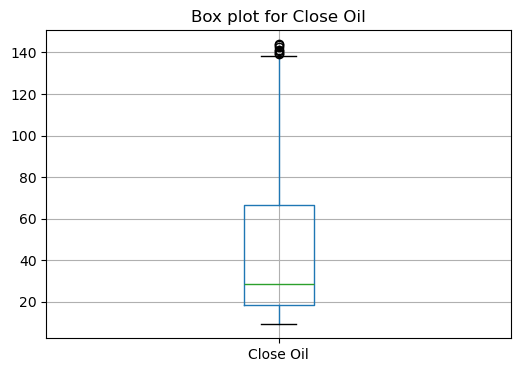

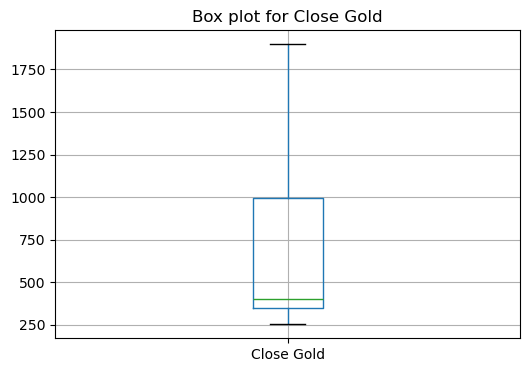

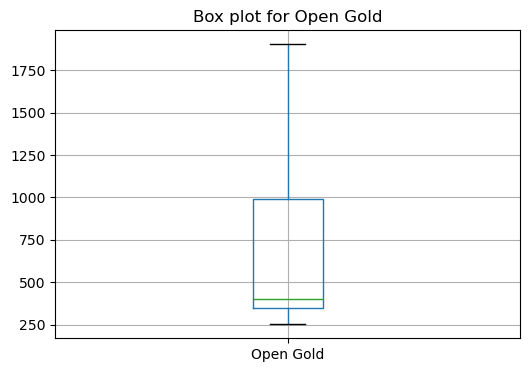

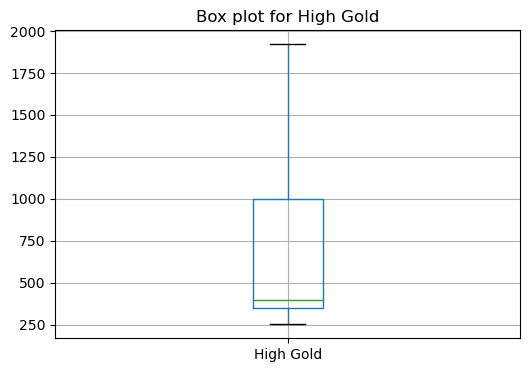

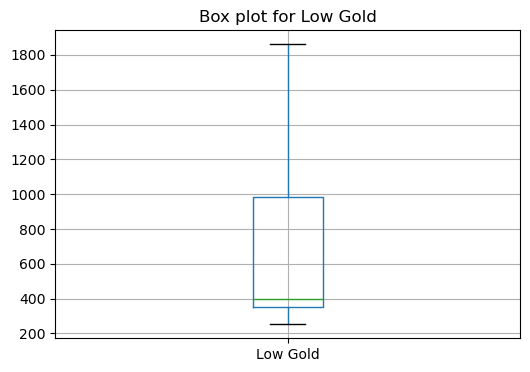

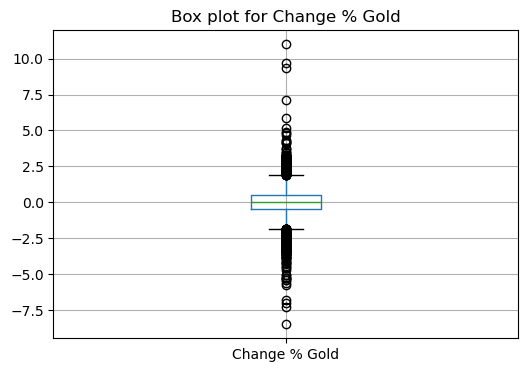

In [19]:
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    df_1987_2017.boxplot(column=[col])
    plt.title(f'Box plot for {col}')
    plt.show()

Comment something about the outliers

## Data correlation
Let's take a look of the initial correlation of our data.

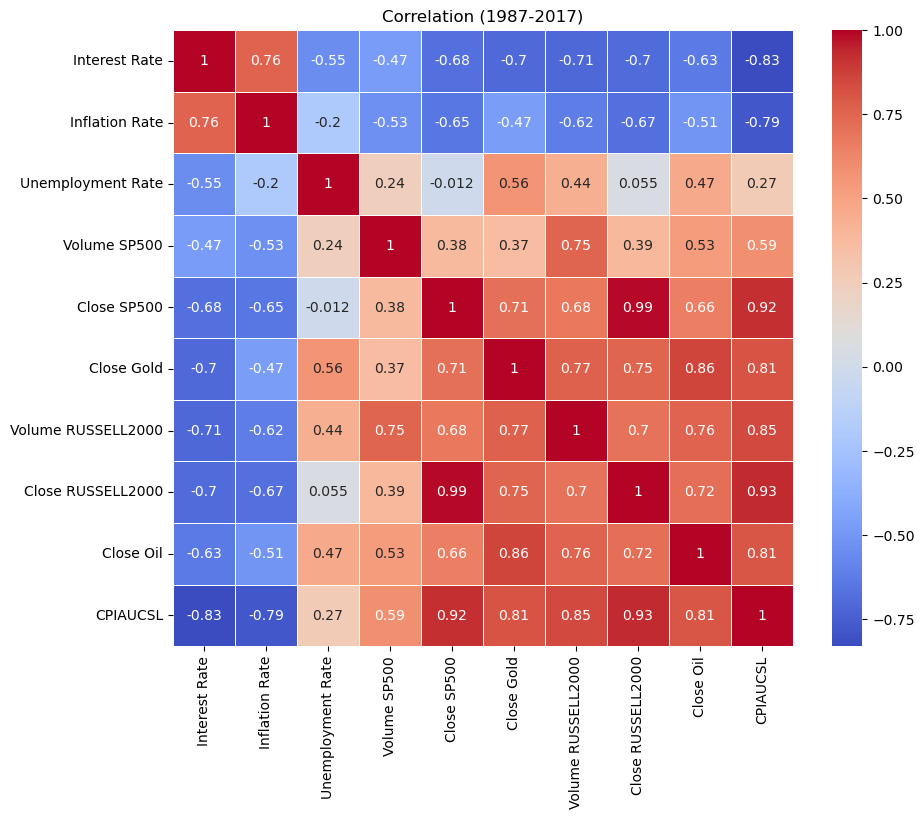

In [20]:
plt.figure(figsize=(10, 8))
corrmatt_1987_2017 = df_1987_2017[['Interest Rate', 'Inflation Rate', 'Unemployment Rate', 'Volume SP500', 'Close SP500', 'Close Gold', 'Volume RUSSELL2000', 'Close RUSSELL2000', 'Close Oil', 'CPIAUCSL']].corr()
sns.heatmap(corrmatt_1987_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987-2017)')
plt.show()

Comment on the correlation

## Feature engineering - adding column with change values
We want to add column with the changes in Open and Close, and Low and High prices for our indexes.

In [22]:
# Calculate the difference between the Open and Close value on the same day
df_1987_2017['OPEN_CLOSE_CHANGE_%_SP500'] = (df_1987_2017['Close SP500'] - df_1987_2017['Open SP500']) / df_1987_2017['Open SP500']
df_1987_2017['OPEN_CLOSE_CHANGE_%_RUSSELL2000'] = (df_1987_2017['Close RUSSELL2000'] - df_1987_2017['Open RUSSELL2000']) / df_1987_2017['Open RUSSELL2000']
df_1987_2017['OPEN_CLOSE_CHANGE_%_Gold'] = (df_1987_2017['Close Gold'] - df_1987_2017['Open Gold']) / df_1987_2017['Open Gold']
# Calculate the difference between the Low and High value on the same day
df_1987_2017['LOW_HIGH_CHANGE_%_SP500'] = (df_1987_2017['High SP500'] - df_1987_2017['Low SP500']) / df_1987_2017['Low SP500']
df_1987_2017['LOW_HIGH_CHANGE_%_RUSSELL2000'] = (df_1987_2017['High RUSSELL2000'] - df_1987_2017['Low RUSSELL2000']) / df_1987_2017['Low RUSSELL2000']
df_1987_2017['LOW_HIGH_CHANGE_%_Gold'] = (df_1987_2017['High Gold'] - df_1987_2017['Low Gold']) / df_1987_2017['Low Gold']

# Calculate other changes PERCENT OR ABS??????
df_1987_2017['Interest_Rate_Change'] = df_1987_2017['Interest Rate'].diff()
df_1987_2017['Inflation_Rate_Change'] = df_1987_2017['Inflation Rate'].diff()
df_1987_2017['Unemployment_Rate_Change'] = df_1987_2017['Unemployment Rate'].diff()
df_1987_2017['CPI_Change'] = df_1987_2017['CPIAUCSL'].diff()

# Volume changes
df_1987_2017['VOLUME_CHANGE_%_RUSSELL2000'] = df_1987_2017['Volume RUSSELL2000'].pct_change()
df_1987_2017['VOLUME_CHANGE_%_SP500'] = df_1987_2017['Volume SP500'].pct_change()




In [23]:
df_1987_2017

,Close SP500,Open SP500,High SP500,Low SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,...,OPEN_CLOSE_CHANGE_%_Gold,LOW_HIGH_CHANGE_%_SP500,LOW_HIGH_CHANGE_%_RUSSELL2000,LOW_HIGH_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,VOLUME_CHANGE_%_RUSSELL2000,VOLUME_CHANGE_%_SP500
0,9.135417,8.054483,9.184320,8.954092,3.787139e+06,7.29,6.0,4.3,115.000,170.820007,...,-0.004850,0.025712,0.006755,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,9.175296,8.163558,9.257685,9.065771,3.981096e+06,7.29,6.0,4.3,115.000,171.399994,...,-0.001208,0.021169,0.004026,0.000000,0.0,0.0,0.0,0.0,-0.021222,0.051215
2,9.175669,8.191843,9.256174,9.065872,3.932984e+06,7.29,6.0,4.3,115.000,172.089996,...,-0.000416,0.020991,0.002673,0.000000,0.0,0.0,0.0,0.0,-0.155473,-0.012085
3,8.993629,8.170532,9.203396,8.942656,4.409449e+06,7.29,6.0,4.3,115.000,172.550003,...,-0.003337,0.029157,0.014636,0.000000,0.0,0.0,0.0,0.0,0.099562,0.121146
4,8.971139,8.015025,9.062113,8.852412,4.329170e+06,7.29,6.0,4.3,115.000,170.210007,...,-0.003875,0.023689,0.010268,0.000000,0.0,0.0,0.0,0.0,0.060934,-0.018206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,83.971982,83.753608,84.327578,83.351554,3.852519e+06,0.54,4.7,2.2,242.637,1362.630005,...,0.004075,0.011710,0.006568,0.007038,0.0,0.0,0.0,0.0,-0.297523,-0.274740
7496,84.235925,84.128478,84.744996,83.783470,5.111105e+06,0.54,4.7,2.2,242.637,1371.589966,...,0.004665,0.011476,0.007575,0.015576,0.0,0.0,0.0,0.0,-0.016565,0.326692
7497,83.446216,84.321632,84.563865,83.224388,7.919421e+06,0.54,4.7,2.2,242.637,1377.780029,...,0.002466,0.016095,0.014751,0.007303,0.0,0.0,0.0,0.0,0.203958,0.549454
7498,83.529571,83.488670,84.079080,83.044043,7.475287e+06,0.54,4.7,2.2,242.637,1360.920044,...,0.013944,0.012464,0.007411,0.016453,0.0,0.0,0.0,0.0,-0.023404,-0.056082


In [26]:
df_1987_2017.isnull().sum()

Close SP500                        0
Open SP500                         0
High SP500                         0
Low SP500                          0
Volume SP500                       0
Interest Rate                      0
Unemployment Rate                  0
Inflation Rate                     0
CPIAUCSL                           0
Open RUSSELL2000                   0
High RUSSELL2000                   0
Low RUSSELL2000                    0
Close RUSSELL2000                  0
Volume RUSSELL2000                 0
Close Oil                          0
Close Gold                         0
Open Gold                          0
High Gold                          0
Low Gold                           0
Change % Gold                      0
Date                               0
OPEN_CLOSE_CHANGE_%_SP500          0
OPEN_CLOSE_CHANGE_%_RUSSELL2000    0
OPEN_CLOSE_CHANGE_%_Gold           0
LOW_HIGH_CHANGE_%_SP500            0
LOW_HIGH_CHANGE_%_RUSSELL2000      0
LOW_HIGH_CHANGE_%_Gold             0
I